In [123]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error

In [124]:
data = pd.read_csv('covidForecasting.csv')
pd.set_option('expand_frame_repr', True)
data.head()

,iso_code,location,date,new_deaths,new_cases,new_tests,new_vaccinations,new_cases_per_thousand,new_tests_per-thousand,new_vaccinations_per_thousand,stringency_index
0,IND,India,1/16/2021,181,15144,803090,191181,15.144,803.090,191.181,68.98
1,IND,India,1/17/2021,145,13788,779377,33120,13.788,779.377,33.120,68.98
2,IND,India,1/18/2021,137,10050,548168,229748,10.050,548.168,229.748,68.98
3,IND,India,1/19/2021,162,13816,709791,220786,13.816,709.791,220.786,68.98
4,IND,India,1/20/2021,151,15244,764120,131649,15.244,764.120,131.649,68.98


In [98]:
#data[(data['location']=='India') & (data['stringency_index']==68.98)]
#data[(data['location']=='India') & ~(data['stringency_index']==68.98)]
#data.loc[(data['location']=='India') & (data['stringency_index']==68.98)]
#options = ['India','Japan']
#data.loc[(data['location'].isin(options)) & (data['stringency_index']==68.98)]
#data = data.reset_index(drop=True)
#data.iloc[[4],[0,1,2,3]]
#data['location'].unique()
#data['location'].value_counts()
#data['date'] = pd.to_datetime(data['date'])

In [125]:
data.sort_values('date',ascending=True,inplace=True)
data['date'].min(), data['date'].max()

('01/01/21', '6/30/2021')

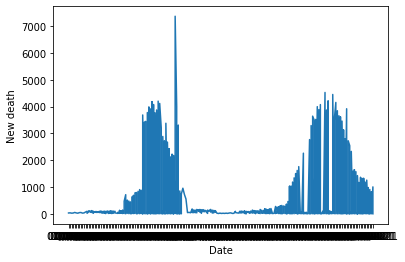

In [126]:
plt.xlabel('Date')
plt.ylabel('New death')
plt.plot(data['date'],data['new_deaths'])

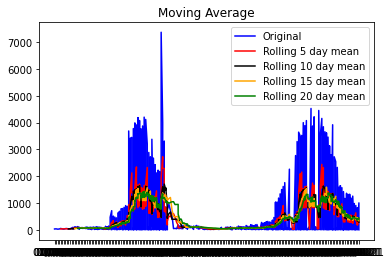

In [127]:
rolling_mean5 = data['new_deaths'].rolling(window = 5).mean()
rolling_mean10 = data['new_deaths'].rolling(window = 10).mean()
rolling_mean15 = data['new_deaths'].rolling(window = 15).mean()
rolling_mean20 = data['new_deaths'].rolling(window = 20).mean()
plt.plot(data['date'],data['new_deaths'], color = 'blue', label = 'Original')
plt.plot(data['date'],rolling_mean5, color = 'red', label = 'Rolling 5 day mean')
plt.plot(data['date'],rolling_mean10, color = 'black', label = 'Rolling 10 day mean')
plt.plot(data['date'],rolling_mean15, color = 'orange', label = 'Rolling 15 day mean')
plt.plot(data['date'],rolling_mean20, color = 'green', label = 'Rolling 20 day mean')
plt.legend(loc = 'best')
plt.title('Moving Average')
plt.show()

In [128]:
data['moving_avg_5day'] = rolling_mean5
data['moving_avg_10day'] = rolling_mean10
data['moving_avg_15day'] = rolling_mean15
data['moving_avg_20day'] = rolling_mean20
data.head()

,iso_code,location,date,new_deaths,new_cases,new_tests,new_vaccinations,new_cases_per_thousand,new_tests_per-thousand,new_vaccinations_per_thousand,stringency_index,moving_avg_5day,moving_avg_10day,moving_avg_15day,moving_avg_20day
168,ISR,Israel,01/01/21,31,5248,101217,71234,5.248,101.217,71.234,82.41,NaN,NaN,NaN,NaN
169,ISR,Israel,01/02/21,36,6289,77160,71626,6.289,77.160,71.626,82.41,NaN,NaN,NaN,NaN
170,ISR,Israel,01/03/21,24,6743,79939,149402,6.743,79.939,149.402,82.41,NaN,NaN,NaN,NaN
171,ISR,Israel,01/04/21,29,6631,111655,151838,6.631,111.655,151.838,82.41,NaN,NaN,NaN,NaN
172,ISR,Israel,01/05/21,51,7966,116538,124854,7.966,116.538,124.854,82.41,34.2,NaN,NaN,NaN


In [129]:
data.dropna(inplace=True)

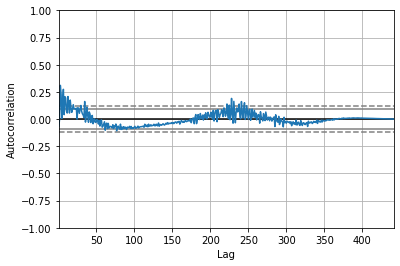

In [130]:
autocorrelation_plot(data['new_cases'])
plt.show()

c:\Users\adith\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


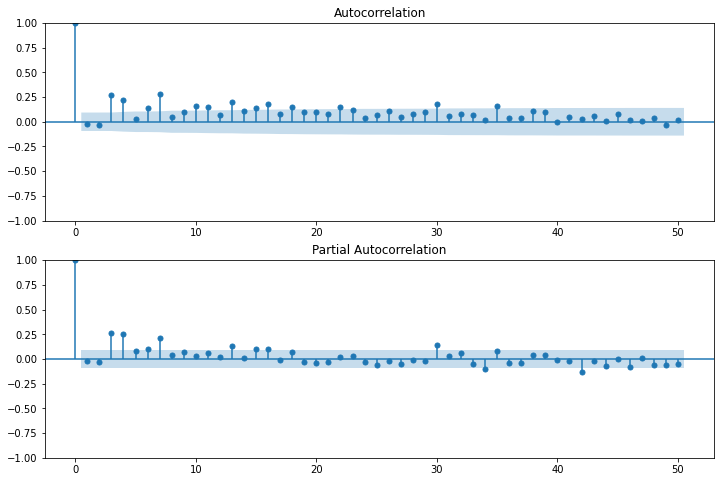

In [131]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(data['new_deaths'].dropna(),lags=50,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(data['new_deaths'].dropna(),lags=50,ax=ax2)

In [132]:
model = ARIMA(data.new_deaths, order=(1,1,0))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:             new_deaths   No. Observations:                  441
Model:                 ARIMA(1, 1, 0)   Log Likelihood               -3816.239
Date:                Sat, 22 Oct 2022   AIC                           7636.477
Time:                        00:32:11   BIC                           7644.651
Sample:                             0   HQIC                          7639.701
                                - 441                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4971      0.032    -15.381      0.000      -0.561      -0.434
sigma2      2.004e+06    8.2e+04     24.453      0.000    1.84e+06    2.16e+06
Ljung-Box (L1) (Q):                  30.11   Jarque-

c:\Users\adith\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:590: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
c:\Users\adith\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:590: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
c:\Users\adith\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:590: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


Test MAE: 707.532


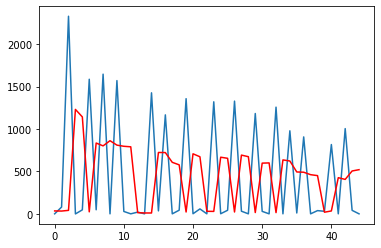

In [133]:
X = data['new_deaths'].values
size = int(len(X) * 0.90)
train, test = X[0:size], X[size:len(X)]
traindf, testdf = data[0:size], data[size:len(X)]
history = [x for x in train]
predictions = list()
# walk-forward validation
for t in range(len(test)):
	model = ARIMA(history, order=(1,1,0))
	model_fit = model.fit()
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	# print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
mae = mean_absolute_error(test, predictions)
print('Test MAE: %.3f' % mae)
# plot forecasts against actual outcomes
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

In [134]:
mae5day = mean_absolute_error(testdf['new_deaths'], testdf['moving_avg_5day'])
mae10day = mean_absolute_error(testdf['new_deaths'], testdf['moving_avg_10day'])
mae15day = mean_absolute_error(testdf['new_deaths'], testdf['moving_avg_15day'])
mae20day = mean_absolute_error(testdf['new_deaths'], testdf['moving_avg_20day'])

print(f'Mean absolute error from 5day moving average prediction: {mae5day}')
print(f'Mean absolute error from 10day moving average prediction: {mae10day}')
print(f'Mean absolute error from 15day moving average prediction: {mae15day}')
print(f'Mean absolute error from 20day moving average prediction: {mae20day}')

Mean absolute error from 5day moving average prediction: 545.6577777777777
Mean absolute error from 10day moving average prediction: 576.3311111111112
Mean absolute error from 15day moving average prediction: 589.8874074074075
Mean absolute error from 20day moving average prediction: 611.9211111111111
